In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
import seaborn as sns

In [3]:
df1=pd.read_csv('cleaned-Data.csv')

df1.head()

,Fever,Tiredness,Dry-Cough,Difficulty-in-Breathing,Sore-Throat,None_Sympton,Pains,Nasal-Congestion,Runny-Nose,Diarrhea,...,Gender_Male,Gender_Transgender,Severity_Mild,Severity_Moderate,Severity_None,Severity_Severe,Contact_Dont-Know,Contact_No,Contact_Yes,Country
0,1,1,1,1,1,0,1,1,1,1,...,1,0,1,0,0,0,0,0,1,China
1,1,1,1,1,1,0,1,1,1,1,...,1,0,1,0,0,0,0,1,0,China
2,1,1,1,1,1,0,1,1,1,1,...,1,0,1,0,0,0,1,0,0,China
3,1,1,1,1,1,0,1,1,1,1,...,1,0,0,1,0,0,0,0,1,China
4,1,1,1,1,1,0,1,1,1,1,...,1,0,0,1,0,0,0,1,0,China


<AxesSubplot:>

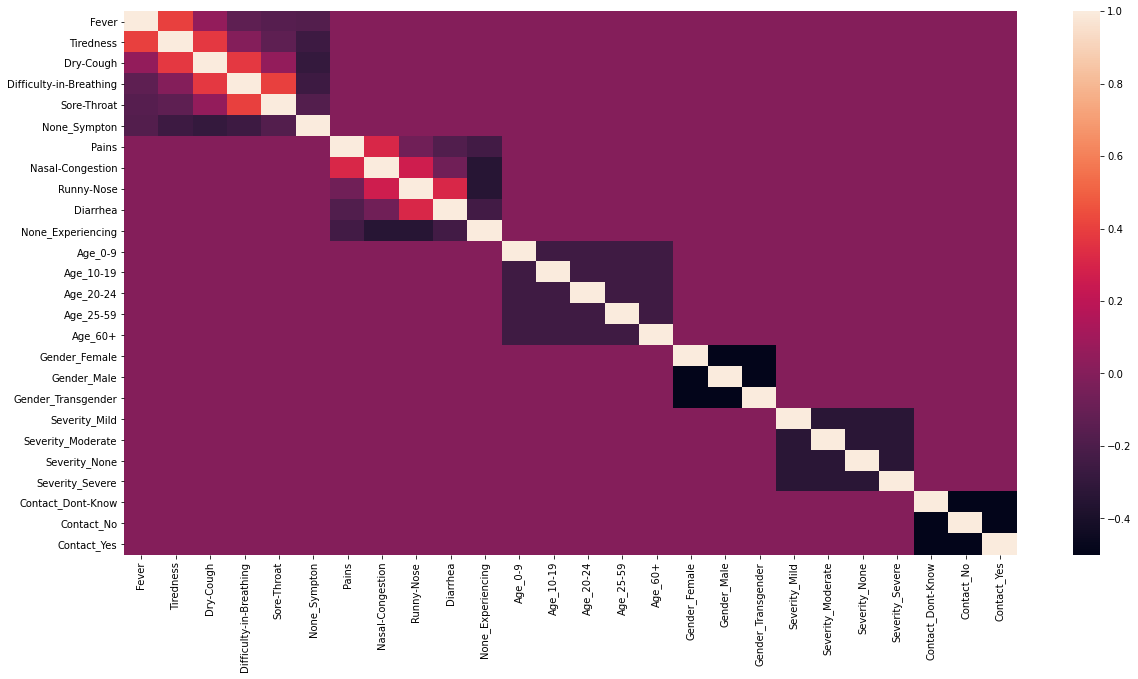

In [4]:
plt.figure(figsize=(20,10))
sns.heatmap(df1.corr())

In [5]:
df=df1.copy()

In [6]:
df_raw=pd.read_csv('Raw-Data.csv')
df_raw

,Country,Age,Gender,Symptoms,Experiencing_Symptoms,Severity,Contact
0,China,0-9,Male,"Fever,Tiredness,Dry-Cough,Difficulty-in-Breath...","Pains,Nasal-Congestion,Runny-Nose,Diarrhea",Mild,Yes
1,Italy,10-19,Female,"Fever,Tiredness,Dry-Cough,Difficulty-in-Breathing","Pains,Nasal-Congestion,Runny-Nose",Moderate,No
2,Iran,20-24,Transgender,"Fever,Tiredness,Dry-Cough","Pains,Nasal-Congestion",Severe,Dont-Know
3,Republic of Korean,25-59,NaN,"Fever,Tiredness",Pains,None,NaN
4,France,60+,NaN,Fever,"Nasal-Congestion,Runny-Nose,Diarrhea",NaN,NaN
5,Spain,NaN,NaN,"Tiredness,Dry-Cough,Difficulty-in-Breathing,So...","Nasal-Congestion,Runny-Nose",NaN,NaN
6,Germany,NaN,NaN,"Tiredness,Dry-Cough,Difficulty-in-Breathing",Nasal-Congestion,NaN,NaN
7,UAE,NaN,NaN,"Tiredness,Dry-Cough","Runny-Nose,Diarrhea",NaN,NaN
8,Other-EUR,NaN,NaN,Tiredness,Runny-Nose,NaN,NaN
9,Other,NaN,NaN,"Dry-Cough,Difficulty-in-Breathing,Sore-Throat",Diarrhea,NaN,NaN


## Data Pre-processing 

### 1. Missing values

In [7]:
df.isna().sum()

Fever                      0
Tiredness                  0
Dry-Cough                  0
Difficulty-in-Breathing    0
Sore-Throat                0
None_Sympton               0
Pains                      0
Nasal-Congestion           0
Runny-Nose                 0
Diarrhea                   0
None_Experiencing          0
Age_0-9                    0
Age_10-19                  0
Age_20-24                  0
Age_25-59                  0
Age_60+                    0
Gender_Female              0
Gender_Male                0
Gender_Transgender         0
Severity_Mild              0
Severity_Moderate          0
Severity_None              0
Severity_Severe            0
Contact_Dont-Know          0
Contact_No                 0
Contact_Yes                0
Country                    0
dtype: int64

#### We can see that the data has no missing values

### 2. Describing the data

In [8]:
df.describe()

,Fever,Tiredness,Dry-Cough,Difficulty-in-Breathing,Sore-Throat,None_Sympton,Pains,Nasal-Congestion,Runny-Nose,Diarrhea,...,Gender_Female,Gender_Male,Gender_Transgender,Severity_Mild,Severity_Moderate,Severity_None,Severity_Severe,Contact_Dont-Know,Contact_No,Contact_Yes
count,316800.000000,316800.000000,316800.000000,316800.000000,316800.000000,316800.000000,316800.000000,316800.000000,316800.000000,316800.000000,...,316800.000000,316800.000000,316800.000000,316800.000000,316800.000000,316800.000000,316800.000000,316800.000000,316800.000000,316800.000000
mean,0.312500,0.500000,0.562500,0.500000,0.312500,0.062500,0.363636,0.545455,0.545455,0.363636,...,0.333333,0.333333,0.333333,0.250000,0.250000,0.250000,0.250000,0.333333,0.333333,0.333333
std,0.463513,0.500001,0.496079,0.500001,0.463513,0.242062,0.481046,0.497930,0.497930,0.481046,...,0.471405,0.471405,0.471405,0.433013,0.433013,0.433013,0.433013,0.471405,0.471405,0.471405
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.500000,1.000000,0.500000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,0.250000,0.250000,0.250000,0.250000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### 3. Duplicate rows

In [9]:
duplicate = df[df.duplicated()]
print('Total duiplicate rows:',len(duplicate))

Total duiplicate rows: 0


### 4. Combining the prediction column 

In [10]:
condition_columns = df.filter(like='Severity_').columns
condition_columns

Index(['Severity_Mild', 'Severity_Moderate', 'Severity_None',
       'Severity_Severe'],
      dtype='object')

In [11]:
severity_ranked=['Severity_None','Severity_Mild','Severity_Moderate', 'Severity_Severe']
df['severity'] = np.argmax(np.array(df[severity_ranked]), axis=1)
df['severity']

0         1
1         1
2         1
3         2
4         2
         ..
316795    3
316796    3
316797    0
316798    0
316799    0
Name: severity, Length: 316800, dtype: int64

In [12]:
age_columns = df.filter(like='Age_').columns
gender_columns = df.filter(like='Gender_').columns
contact_columns = df.filter(like='Contact_').columns
age_columns

Index(['Age_0-9', 'Age_10-19', 'Age_20-24', 'Age_25-59', 'Age_60+'], dtype='object')

In [13]:
age_ranked=['Age_0-9', 'Age_10-19', 'Age_20-24', 'Age_25-59', 'Age_60+']
gender_ranked=['Gender_Male', 'Gender_Female', 'Gender_Transgender']
contact_ranked=['Contact_Dont-Know', 'Contact_No', 'Contact_Yes']

In [14]:
df['age'] = np.argmax(np.array(df[age_ranked]), axis=1)
df['gender'] = np.argmax(np.array(df[gender_ranked]), axis=1)
df['contact'] = np.argmax(np.array(df[contact_ranked]), axis=1)

In [15]:
df.drop(columns=age_ranked, inplace=True)
df.drop(columns=gender_ranked, inplace=True)
df.drop(columns=contact_ranked, inplace=True)
df.drop(columns=severity_ranked, inplace=True)

In [16]:
df.head()

,Fever,Tiredness,Dry-Cough,Difficulty-in-Breathing,Sore-Throat,None_Sympton,Pains,Nasal-Congestion,Runny-Nose,Diarrhea,None_Experiencing,Country,severity,age,gender,contact
0,1,1,1,1,1,0,1,1,1,1,0,China,1,0,0,2
1,1,1,1,1,1,0,1,1,1,1,0,China,1,0,0,1
2,1,1,1,1,1,0,1,1,1,1,0,China,1,0,0,0
3,1,1,1,1,1,0,1,1,1,1,0,China,2,0,0,2
4,1,1,1,1,1,0,1,1,1,1,0,China,2,0,0,1


In [17]:
df.shape

(316800, 16)

## Data Visualization

### 1. Pie chart

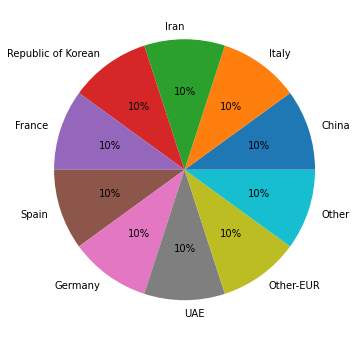

In [18]:
count_country=Counter(df.Country)
count_country

plt.figure(figsize=(6,6))
plt.pie(count_country.values(), labels=count_country.keys(), autopct='%1.f%%')
plt.show()

### 2. Severity count plot

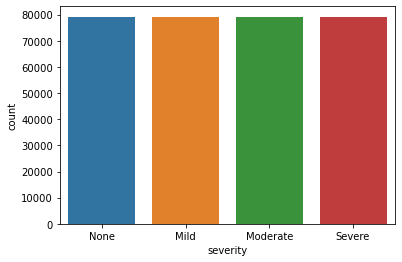

In [19]:
sns.countplot(x=df['severity'])
plt.xticks(ticks=[0,1,2,3], labels=['None', 'Mild', 'Moderate', 'Severe'])
plt.show()

## Feature-selection

### 1. High Severity 

In [20]:
# Considering only relevant columns of symptoms for high severity 
df_high=df[df['severity']==3].copy()
for i in df.columns[11:]:
    df_high = df_high.drop(i, axis=1)



# Show the the tope 5 obersrvation of the dataset
display(df_high)

,Fever,Tiredness,Dry-Cough,Difficulty-in-Breathing,Sore-Throat,None_Sympton,Pains,Nasal-Congestion,Runny-Nose,Diarrhea,None_Experiencing
6,1,1,1,1,1,0,1,1,1,1,0
7,1,1,1,1,1,0,1,1,1,1,0
8,1,1,1,1,1,0,1,1,1,1,0
18,1,1,1,1,1,0,1,1,1,0,0
19,1,1,1,1,1,0,1,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
316783,0,0,0,0,0,1,0,0,0,1,0
316784,0,0,0,0,0,1,0,0,0,1,0
316794,0,0,0,0,0,1,0,0,0,0,1
316795,0,0,0,0,0,1,0,0,0,0,1


<AxesSubplot:>

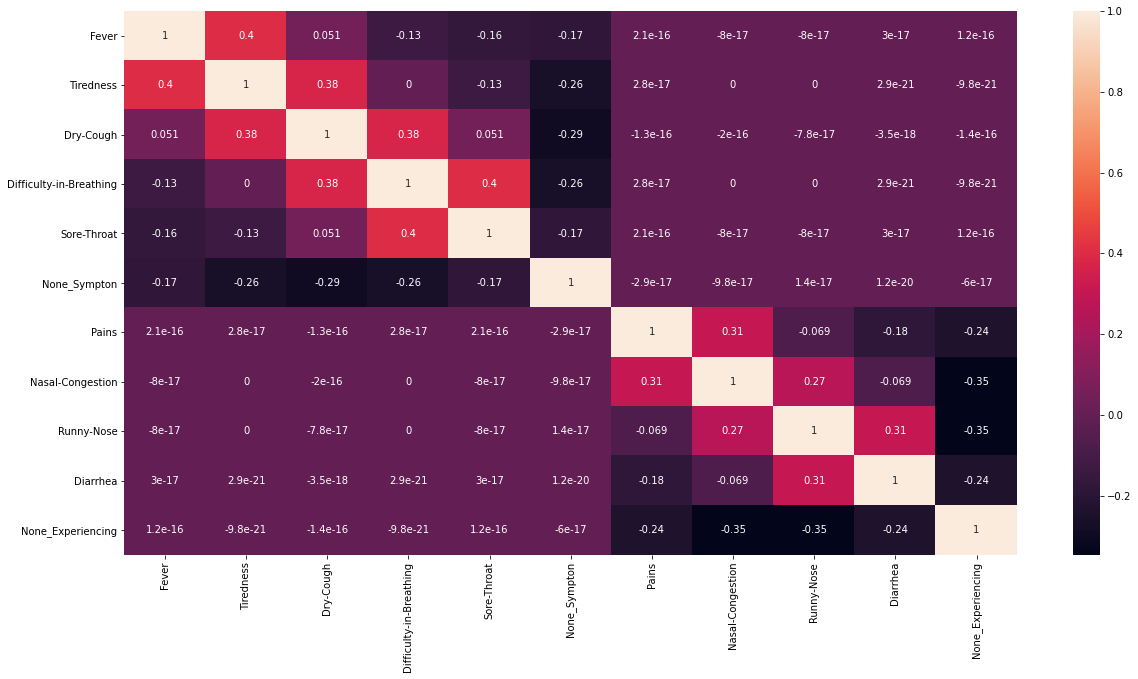

In [22]:
plt.figure(figsize=(20,10))
sns.heatmap(df_high.corr(), annot=True)

In [24]:
# Import important libraries in python 
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

ModuleNotFoundError: No module named 'mlxtend'

In [22]:
# Generate frequent item sets that have a support of at least 10%
frequent_itemsets = apriori(df_high, min_support=0.1, use_colnames=True)

# Generate the rules with their corresponding support, confidence and lift
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.3)

# Show generated rules
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Fever),(Tiredness),0.312500,0.500000,0.250000,0.800000,1.600000,0.093750,2.500000
1,(Tiredness),(Fever),0.500000,0.312500,0.250000,0.500000,1.600000,0.093750,1.375000
2,(Dry-Cough),(Fever),0.562500,0.312500,0.187500,0.333333,1.066667,0.011719,1.031250
3,(Fever),(Dry-Cough),0.312500,0.562500,0.187500,0.600000,1.066667,0.011719,1.093750
4,(Fever),(Difficulty-in-Breathing),0.312500,0.500000,0.125000,0.400000,0.800000,-0.031250,0.833333
...,...,...,...,...,...,...,...,...,...
397,"(Dry-Cough, Nasal-Congestion)","(Runny-Nose, Diarrhea)",0.306818,0.272727,0.102273,0.333333,1.222222,0.018595,1.090909
398,"(Dry-Cough, Diarrhea)","(Nasal-Congestion, Runny-Nose)",0.204545,0.363636,0.102273,0.500000,1.375000,0.027893,1.272727
399,"(Dry-Cough, Runny-Nose)","(Nasal-Congestion, Diarrhea)",0.306818,0.181818,0.102273,0.333333,1.833333,0.046488,1.227273
400,"(Nasal-Congestion, Diarrhea)","(Dry-Cough, Runny-Nose)",0.181818,0.306818,0.102273,0.562500,1.833333,0.046488,1.584416


In [23]:
rules[ (rules['lift'] >= 1.5) & (rules['confidence'] >= 0.7) ]. \
sort_values('lift', ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
286,"(Sore-Throat, Tiredness)","(Dry-Cough, Difficulty-in-Breathing)",0.125000,0.375000,0.125000,1.0,2.666667,0.078125,inf
253,"(Difficulty-in-Breathing, Fever)","(Dry-Cough, Tiredness)",0.125000,0.375000,0.125000,1.0,2.666667,0.078125,inf
246,"(Dry-Cough, Difficulty-in-Breathing, Fever)",(Tiredness),0.125000,0.500000,0.125000,1.0,2.000000,0.062500,inf
66,"(Dry-Cough, Fever)",(Tiredness),0.187500,0.500000,0.187500,1.0,2.000000,0.093750,inf
72,"(Difficulty-in-Breathing, Fever)",(Tiredness),0.125000,0.500000,0.125000,1.0,2.000000,0.062500,inf
348,"(Dry-Cough, Sore-Throat, Runny-Nose)",(Difficulty-in-Breathing),0.102273,0.500000,0.102273,1.0,2.000000,0.051136,inf
337,"(Dry-Cough, Nasal-Congestion, Sore-Throat)",(Difficulty-in-Breathing),0.102273,0.500000,0.102273,1.0,2.000000,0.051136,inf
279,"(Dry-Cough, Sore-Throat, Tiredness)",(Difficulty-in-Breathing),0.125000,0.500000,0.125000,1.0,2.000000,0.062500,inf
132,"(Sore-Throat, Tiredness)",(Difficulty-in-Breathing),0.125000,0.500000,0.125000,1.0,2.000000,0.062500,inf
155,"(Dry-Cough, Sore-Throat)",(Difficulty-in-Breathing),0.187500,0.500000,0.187500,1.0,2.000000,0.093750,inf


In [24]:
rules[(rules['confidence'] >= 0.7)].sort_values('leverage', ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
102,"(Difficulty-in-Breathing, Tiredness)",(Dry-Cough),0.250000,0.5625,0.250000,1.00,1.777778,0.109375,inf
0,(Fever),(Tiredness),0.312500,0.5000,0.250000,0.80,1.600000,0.093750,2.50
27,(Difficulty-in-Breathing),(Dry-Cough),0.500000,0.5625,0.375000,0.75,1.333333,0.093750,1.75
39,(Sore-Throat),(Difficulty-in-Breathing),0.312500,0.5000,0.250000,0.80,1.600000,0.093750,2.50
66,"(Dry-Cough, Fever)",(Tiredness),0.187500,0.5000,0.187500,1.00,2.000000,0.093750,inf
...,...,...,...,...,...,...,...,...,...
349,"(Difficulty-in-Breathing, Sore-Throat, Runny-N...",(Dry-Cough),0.136364,0.5625,0.102273,0.75,1.333333,0.025568,1.75
339,"(Nasal-Congestion, Difficulty-in-Breathing, So...",(Dry-Cough),0.136364,0.5625,0.102273,0.75,1.333333,0.025568,1.75
311,"(Nasal-Congestion, Pains, Tiredness)",(Dry-Cough),0.136364,0.5625,0.102273,0.75,1.333333,0.025568,1.75
270,"(Tiredness, Fever, Runny-Nose)",(Dry-Cough),0.136364,0.5625,0.102273,0.75,1.333333,0.025568,1.75


## Unsupervised learning 

In [25]:
df['Symptoms_Score'] = df.iloc[:,:5].sum(axis=1) + df.iloc[:,6:10].sum(axis=1)

<AxesSubplot:>

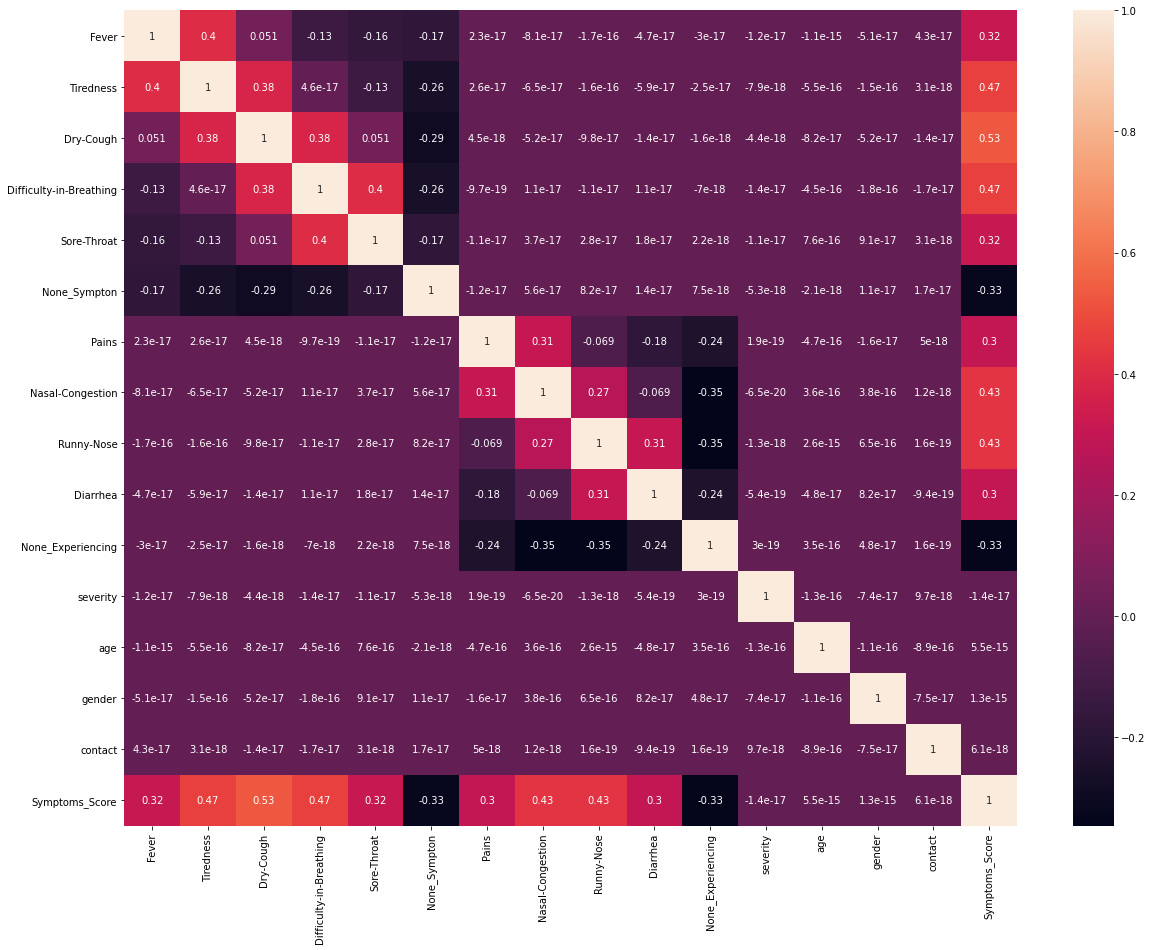

In [26]:
plt.figure(figsize=(20,15))
sns.heatmap(df.corr(), annot=True)

In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pgmpy.models import BayesianModel
from pgmpy.estimators import MaximumLikelihoodEstimator
from pgmpy.inference import VariableElimination
import networkx as nn

In [34]:
df['severity']

0         1
1         1
2         1
3         2
4         2
         ..
316795    3
316796    3
316797    0
316798    0
316799    0
Name: severity, Length: 316800, dtype: int64

In [49]:
model = BayesianModel([('gender','Fever'),('gender','Tiredness'),('gender','Dry-Cough'),('gender','Difficulty-in-Breathing'),('gender','Sore-Throat'),('gender','None_Sympton'),('gender','Pains'),('gender','Nasal-Congestion'),('gender','Runny-Nose'),('gender','Diarrhea'),
                      #('age','Fever'),('age','Tiredness'),('age','Dry-Cough'),('age','Difficulty-in-Breathing'),('age','Sore-Throat'),('age','None_Sympton'),('age','Pains'),('age','Nasal-Congestion'),('age','Runny-Nose'),('age','Diarrhea'),
                       ('contact','Fever'),('contact','Tiredness'),('contact','Dry-Cough'),('contact','Difficulty-in-Breathing'),('contact','Sore-Throat'),('contact','None_Sympton'),('contact','Pains'),('contact','Nasal-Congestion'),('contact','Runny-Nose'),('contact','Diarrhea'),
                      ('Country','gender'),('Country','contact'),
                       ('Fever','severity'),('Tiredness','severity'),('Runny-Nose','severity'),('Nasal-Congestion','severity'),('Diarrhea','severity'),('Difficulty-in-Breathing','severity'),('Sore-Throat','severity'),('None_Sympton','severity'),('Pains','severity'),('Dry-Cough','severity')]) 

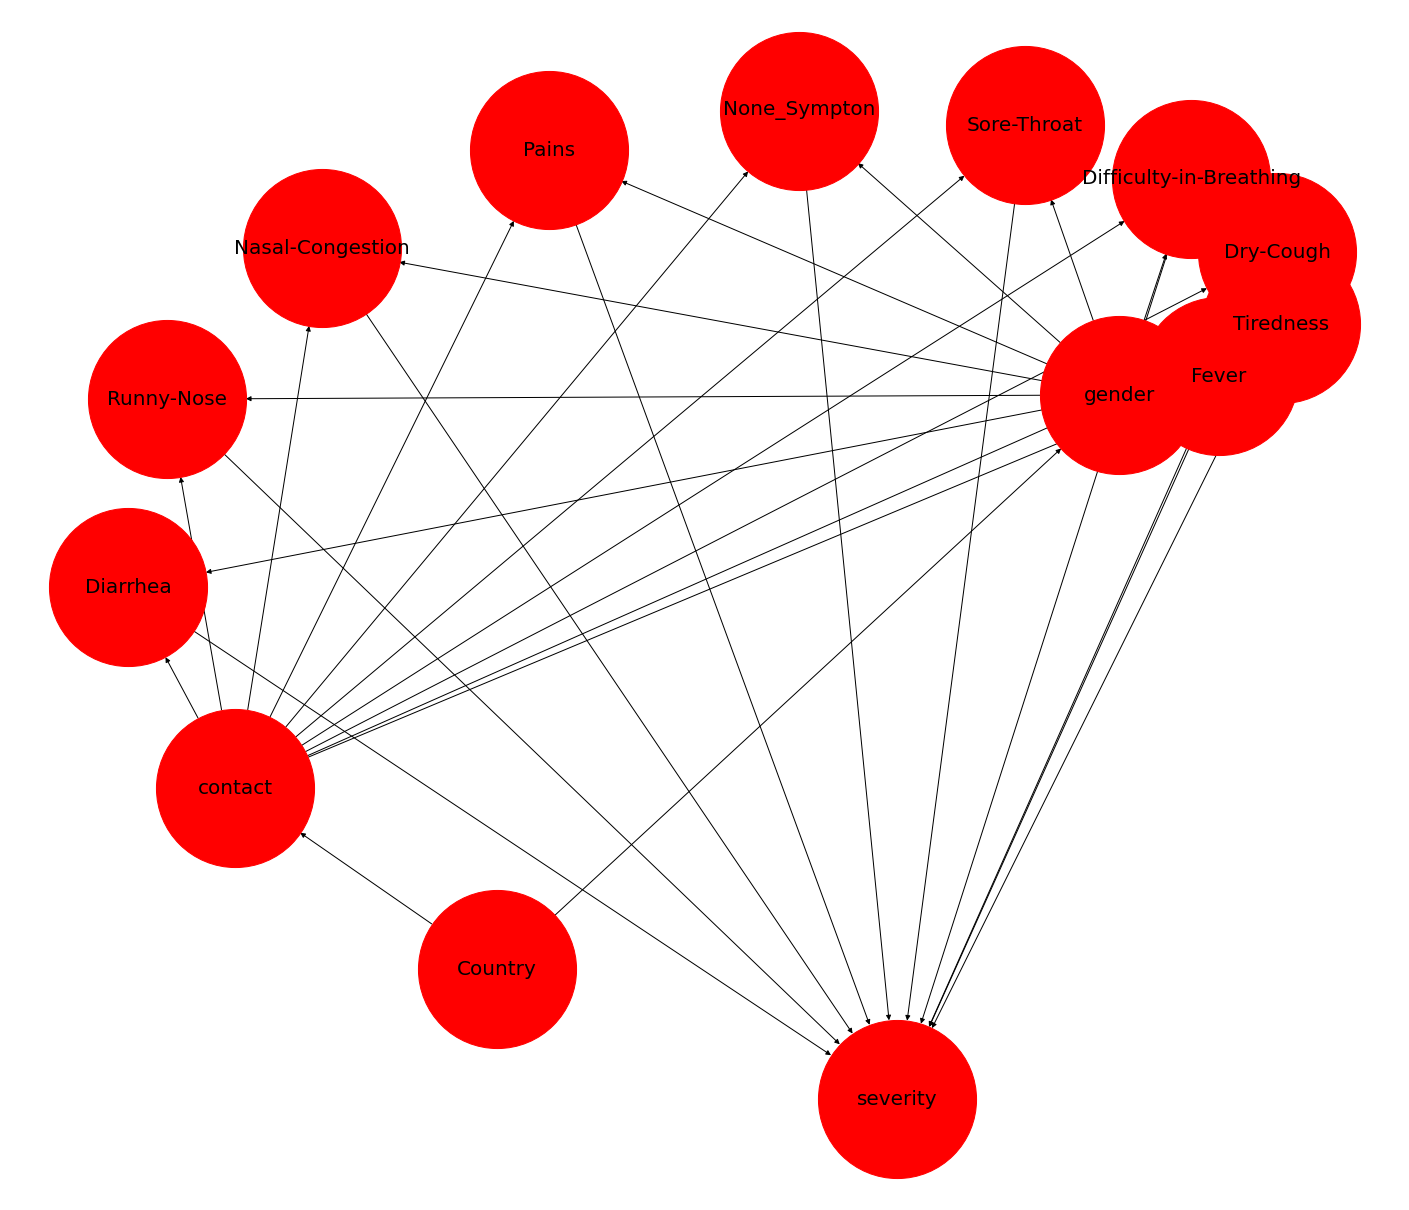

In [50]:
model.fit(df,estimator=MaximumLikelihoodEstimator)
fig,ax = plt.subplots(figsize=(25,22))
#position = nn.kamada_kawai_layout(model)
position = nn.spiral_layout(model)
nn.draw(model,pos=position,ax=ax,with_labels=True,node_color='red',node_size=25000,font_size=20)
plt.show()

In [51]:
inference = VariableElimination(model)

In [52]:
query1 = inference.map_query(variables=['severity'],evidence={'Fever':1,'Dry-Cough':1,'Sore-Throat':1,'Pains':1,'Difficulty-in-Breathing':1,'Nasal-Congestion':1})
print(query1)

Finding Elimination Order: : 100%|██████████| 7/7 [00:00<00:00, 1004.35it/s]

Eliminating: gender: 100%|██████████| 7/7 [00:00<00:00, 116.62it/s]

{'severity': 0}


In [39]:
df_temp=pd.read_csv('Cleaned-Data-updated.csv')
df_temp.head()

,Fever,Tiredness,Dry-Cough,Difficulty-in-Breathing,Sore-Throat,None_Sympton,Pains,Nasal-Congestion,Runny-Nose,Diarrhea,None_Experiencing,Country,gender,age,Severity_level,contact_with_covid19_patient
0,1,1,1,1,1,0,1,1,1,1,0,China,1.0,1,1.0,2.0
1,1,1,1,1,1,0,1,1,1,1,0,China,1.0,1,1.0,3.0
2,1,1,1,1,1,0,1,1,1,1,0,China,1.0,1,2.0,1.0
3,1,1,1,1,1,0,1,1,1,1,0,China,1.0,1,2.0,2.0
4,1,1,1,1,1,0,1,1,1,1,0,China,1.0,1,2.0,3.0


In [48]:
df_temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 316800 entries, 0 to 316799
Data columns (total 16 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Fever                         316800 non-null  int64  
 1   Tiredness                     316800 non-null  int64  
 2   Dry-Cough                     316800 non-null  int64  
 3   Difficulty-in-Breathing       316800 non-null  int64  
 4   Sore-Throat                   316800 non-null  int64  
 5   None_Sympton                  316800 non-null  int64  
 6   Pains                         316800 non-null  int64  
 7   Nasal-Congestion              316800 non-null  int64  
 8   Runny-Nose                    316800 non-null  int64  
 9   Diarrhea                      316800 non-null  int64  
 10  None_Experiencing             316800 non-null  int64  
 11  Country                       316800 non-null  object 
 12  gender                        316799 non-nul